<a href="https://colab.research.google.com/github/Akash-verma998/tensor2.0/blob/main/Supervised_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
print(tf.__version__)

2.15.0


In [29]:
boston_load = datasets.fetch_california_housing()
feature_columns = boston_load.feature_names
target_column = boston_load.target
boston_data = pd.DataFrame(boston_load.data,
columns=feature_columns).astype(np.float32)
boston_data['MEDV'] = target_column.astype(np.float32)
boston_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.880001,-122.230003,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.849998,-122.239998,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.849998,-122.250000,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,3.422


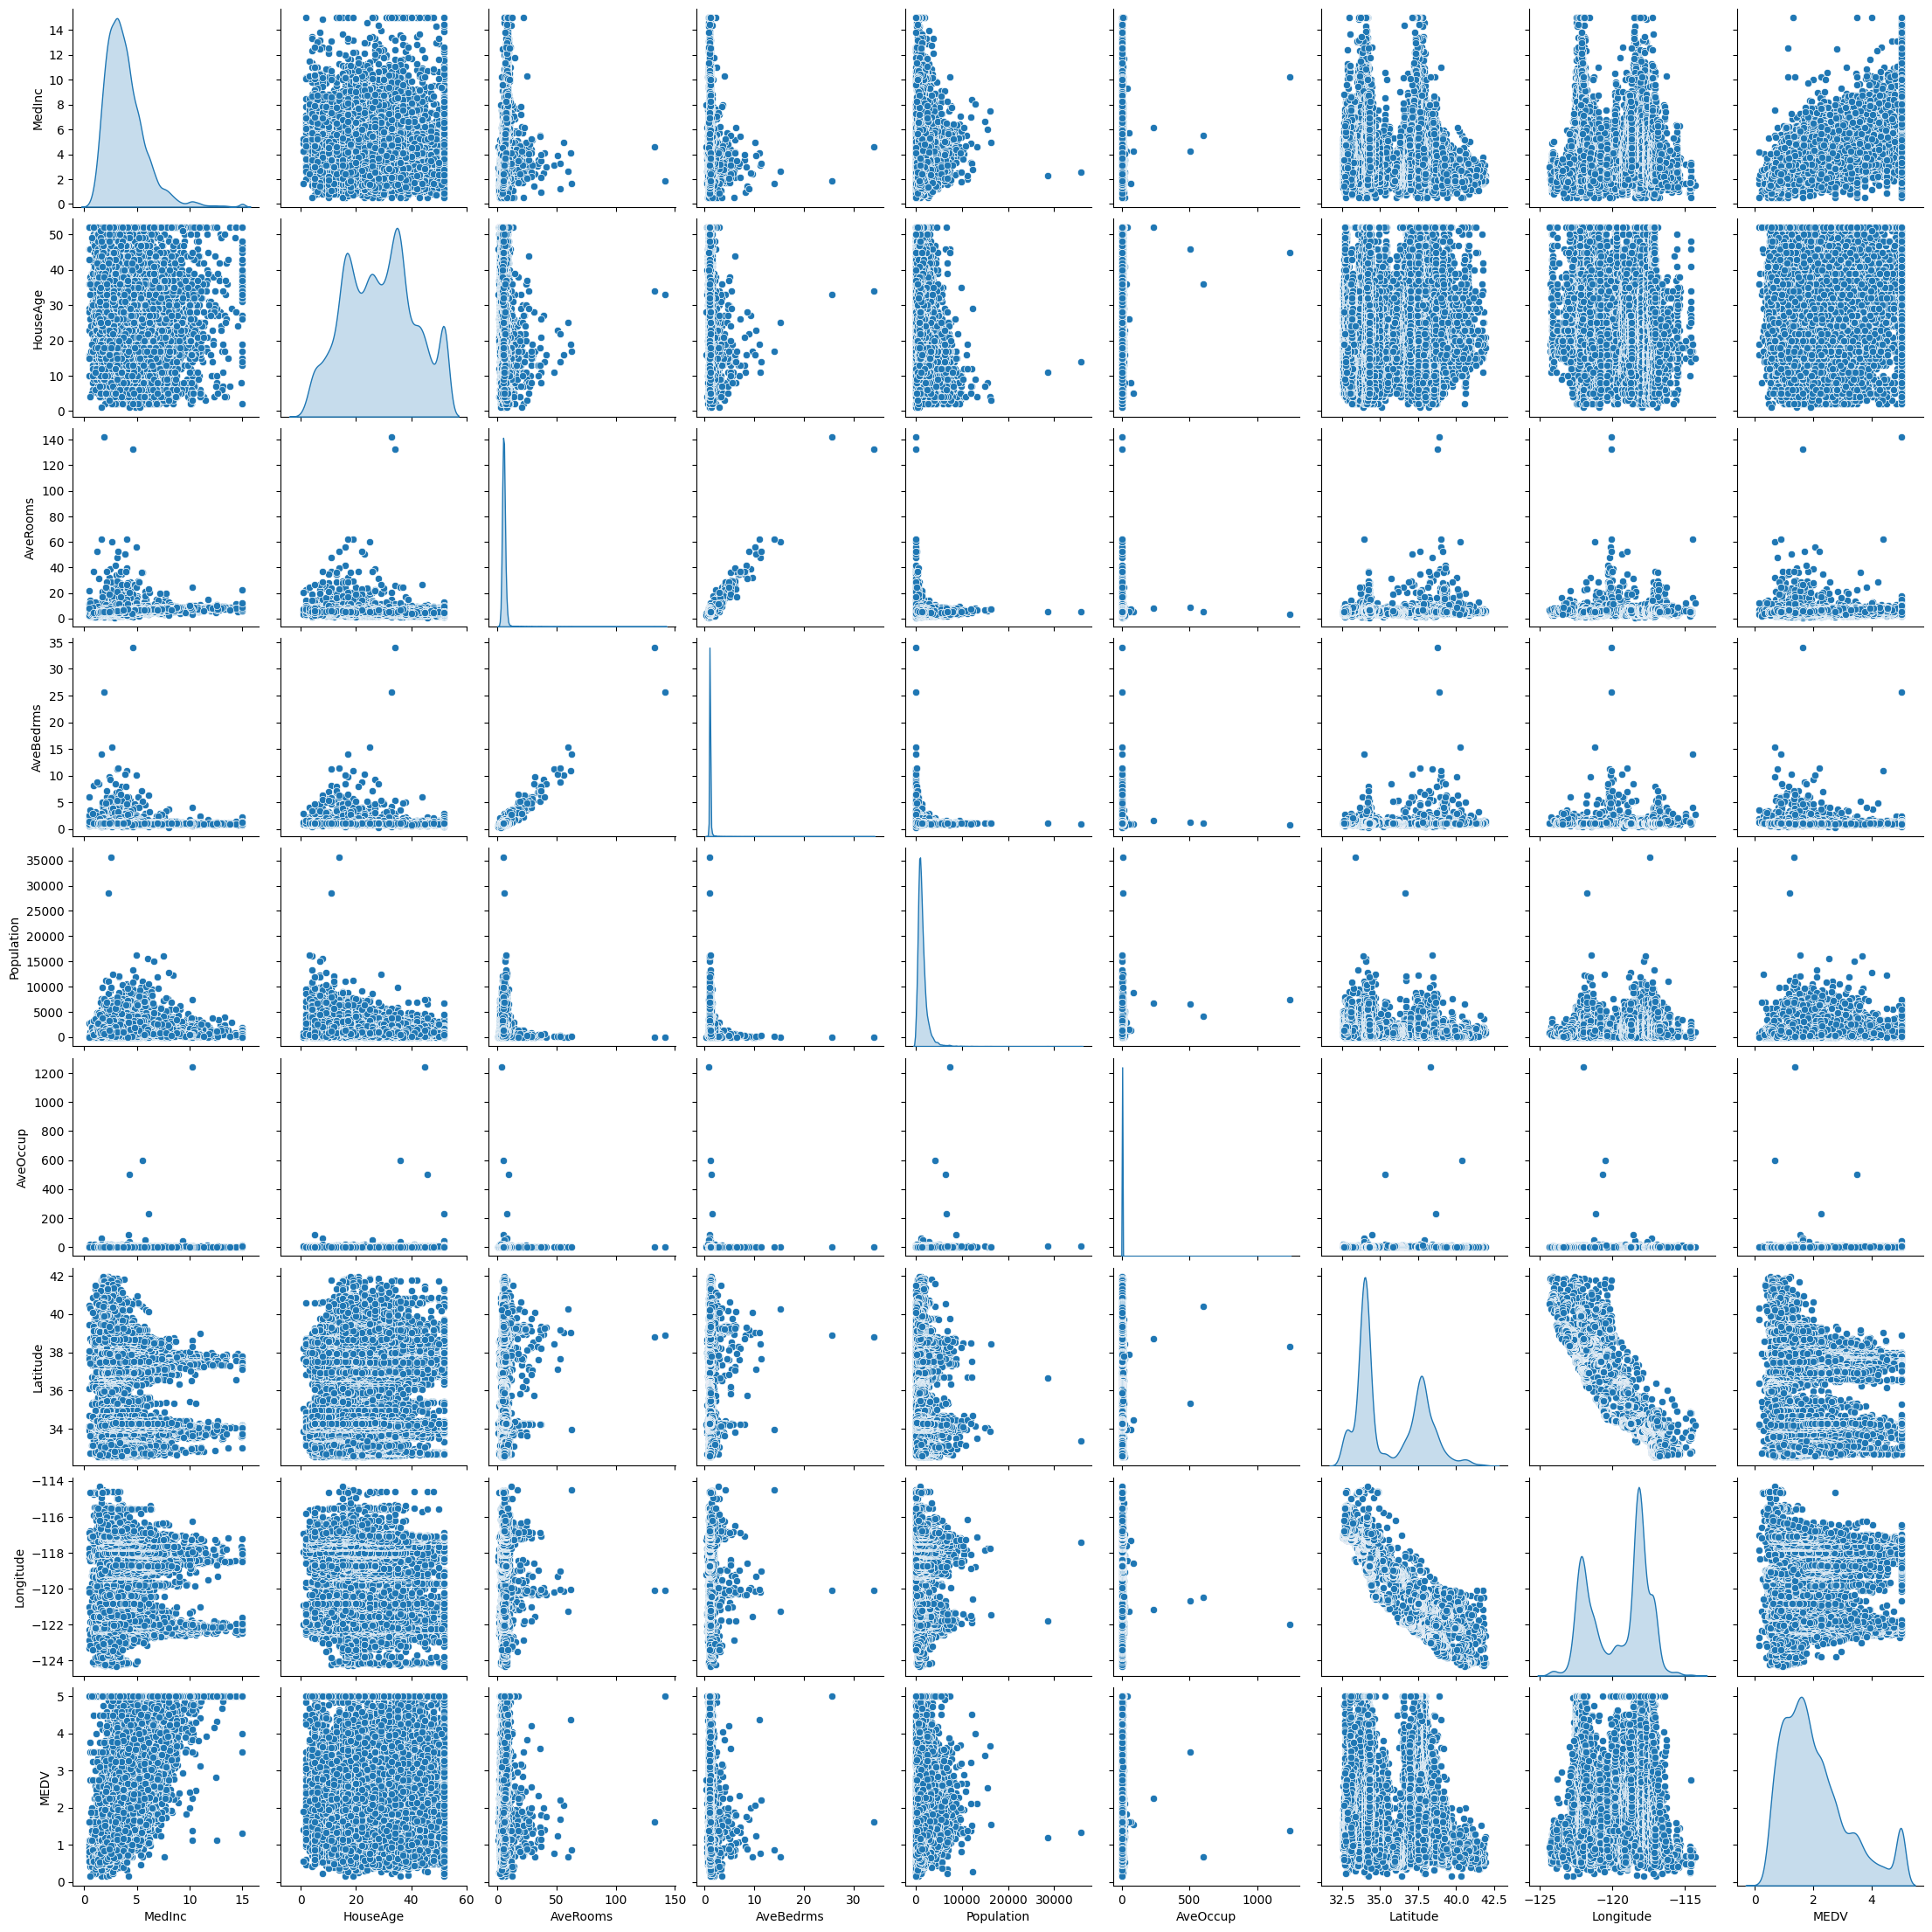

In [30]:
sb.pairplot(boston_data, diag_kind="kde")

In [5]:
correlation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [31]:
stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585557,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909088
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066666
Population,20640.0,1425.476685,1132.462158,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386049,0.692308,2.429741,2.818116,3.282261,1243.333374
Latitude,20640.0,35.631863,2.135952,32.540001,33.930000,34.259998,37.709999,41.950001
Longitude,20640.0,-119.569710,2.003532,-124.349998,-121.800003,-118.489998,-118.010002,-114.309998
MEDV,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [32]:
X_data = boston_data[[i for i in boston_data.columns if i not in ['MEDV']]]
Y_data = boston_data[['MEDV']]

In [52]:
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.
shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features:',test_features.shape[1])
print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  16512
No. of rows in Test Features:  4128
No. of columns in Training Features:  8
No. of columns in Test Features: 8
No. of rows in Training Label:  16512
No. of rows in Test Label:  4128
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [53]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']
normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [54]:
def feed_input(features_dataframe, target_dataframe,num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

In [55]:
train_feed_input = feed_input(normed_train_features,training_labels)
train_feed_input_testing = feed_input(normed_train_features,training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features,test_labels, num_of_epochs=1, shuffle=False)

In [56]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]
linear_model = LinearRegressor(feature_columns=feature_columns_numeric, optimizer='RMSProp')
linear_model.train(train_feed_input)

In [57]:
feature_columns_numeric

[NumericColumn(key='MedInc', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='HouseAge', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveRooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveBedrms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AveOccup', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [58]:
train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)
train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])

In [59]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels,test_predictions_df], axis=1)

In [60]:
def calculate_errors_and_r2(y_true, y_pred):
  mean_squared_err = (mean_squared_error(y_true, y_pred))
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2
train_mean_squared_error, train_root_mean_squared_error,train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)
test_mean_squared_error, test_root_mean_squared_error,test_r2_score_percentage = calculate_errors_and_r2(test_labels, test_predictions_series)
print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)
print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  0.92656326
Training Data Root Mean Squared Error =  0.9625816
Training Data R2 =  29.0
Test Data Mean Squared Error =  0.9167723
Test Data Root Mean Squared Error =  0.9574823
Test Data R2 =  35.0
